# Utilizing Fasttext for Sentence Embedding and Classification.

### prerequisite

1. [FastText](https://fasttext.cc/)

2. [Training Sentencepiece](https://github.com/google/sentencepiece)

In [1]:
import pandas as pd
import sentencepiece as spm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import sklearn
import numpy as np

In [2]:
df = pd.read_csv("my_sentiment_data.csv") # load your sentiment csv data
# it should have two columns text, sentiment
# The classification task here leverages sentencepiece as sentencepiece is language agnostic.
sp = spm.SentencePieceProcessor()
sp.load("SentencePiece_Tokenizer.model") # load sentence piece tokenizer model

True

In [ ]:
# encode the target column.
encoder = LabelEncoder()
target = encoder.fit_transform(df.sentiment)

# Fasttext Sentence Embedding

In [ ]:
# # Download Fasttext embedding from there website
# !wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.hi.300.bin.gz
# !gunzip cc.hi.300.bin.gz

In [9]:
import fasttext
import fasttext.util
ft = fasttext.load_model("cc.hi.300.bin") # load the model

In [ ]:
sentence_emb = df.text.apply(ft.get_sentence_vector).apply(
    lambda x :x.reshape(1,300)).values.tolist() # get sentence embedding

sentence_emb_array = np.concatenate(sentence_emb) # get array

# create train test split
X_train, X_test, y_train, y_test  = train_test_split(
                                        sentence_emb_array ,
                                        target,
                                        test_size=0.3,
                                        stratify=target)

## Logistic Regression for classification

              precision    recall  f1-score   support

    negative       0.61      0.68      0.65      1645
     neutral       0.39      0.49      0.43       930
    positive       0.69      0.54      0.60      1953

    accuracy                           0.58      4528
   macro avg       0.56      0.57      0.56      4528
weighted avg       0.60      0.58      0.58      4528



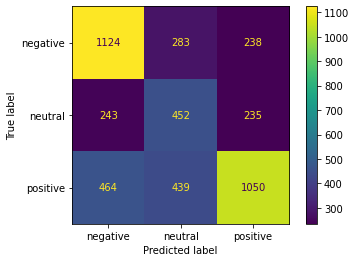

In [10]:
clf = LogisticRegression(class_weight = "balanced",max_iter=200).fit(X_train, y_train)

prediction = clf.predict(X_test)

print(classification_report(y_test,prediction,target_names=encoder.classes_))

sklearn.metrics.plot_confusion_matrix(clf,X_test,y_test,display_labels=encoder.classes_,values_format="d")